#Data Understanding

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [ ]:
import warnings

warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
df = pd.read_csv('customer_supermarket.csv', sep='\t', index_col=0)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
541905,581587,09/12/11 12:50,"2,1",12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
541906,581587,09/12/11 12:50,"4,15",12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
541907,581587,09/12/11 12:50,"4,15",12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
541908,581587,09/12/11 12:50,"4,95",12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


## Basic checks

In [ ]:
n_samples = df.shape[0]
df.drop_duplicates(ignore_index=True, inplace=True)
duplicates = n_samples - df.shape[0]
print('Number of canceled duplicates: {}/{} ({:.2f}%)'.format(duplicates, n_samples, duplicates / n_samples * 100))

Number of canceled duplicates: 5232/471910 (1.11%)


In [ ]:
df.dtypes

,0
BasketID,object
BasketDate,object
Sale,object
CustomerID,float64
CustomerCountry,object
ProdID,object
ProdDescr,object
Qta,int64


In [ ]:
# Ensure 'Sale' column is treated as string and replace ',' with '.'
df['Sale'] = df['Sale'].fillna('').astype(str).str.replace(',', '.')

# Convert 'Sale' column to numeric
df['Sale'] = pd.to_numeric(df['Sale'], errors='coerce')

# Adjust other column types as needed
df = df.astype({
    'BasketDate': 'datetime64[ns]',
    'CustomerID': 'object'
})


In [ ]:
df.dtypes

,0
BasketID,object
BasketDate,datetime64[ns]
Sale,float64
CustomerID,object
CustomerCountry,object
ProdID,object
ProdDescr,object
Qta,int64


## Data exploration

In [ ]:
df.isnull().any()

,0
BasketID,False
BasketDate,False
Sale,False
CustomerID,True
CustomerCountry,False
ProdID,False
ProdDescr,True
Qta,False


In [ ]:
n_samples = df.shape[0]
null_customers = df['CustomerID'].isnull().sum()
print('Number of null CustomerID(s): {}/{} ({:.2f}%)'.format(null_customers, n_samples, null_customers / n_samples * 100))
null_prod_descrs = df['ProdDescr'].isnull().sum()
print('Number of null ProdDescr(s): {}/{} ({:.2f}%)'.format(null_prod_descrs, n_samples, null_prod_descrs / n_samples * 100))

Number of null CustomerID(s): 65073/466678 (13.94%)
Number of null ProdDescr(s): 753/466678 (0.16%)


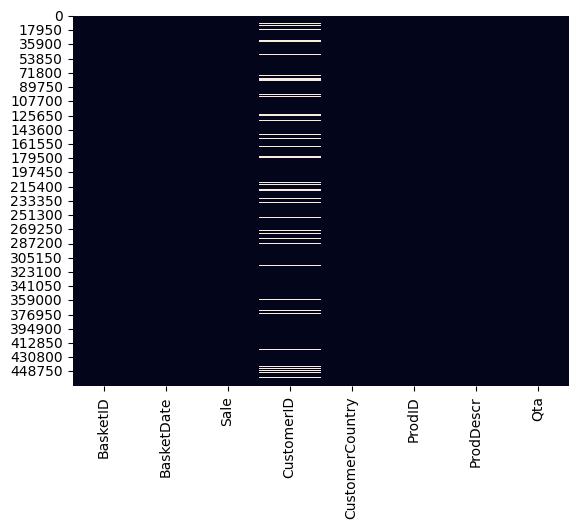

In [ ]:
sns.heatmap(df.isnull(), cbar=False);

In [ ]:
df.describe()

,BasketDate,Sale,Qta
count,466678,466678.000000,466678.000000
mean,2011-06-18 05:22:13.245492736,4.049057,10.806528
min,2010-01-12 08:26:00,-11062.060000,-80995.000000
25%,2011-03-25 14:53:00,1.250000,2.000000
50%,2011-07-06 11:32:00,2.080000,4.000000
75%,2011-10-05 15:19:00,3.750000,12.000000
max,2011-12-10 17:19:00,38970.000000,80995.000000
std,NaN,84.237135,232.627771


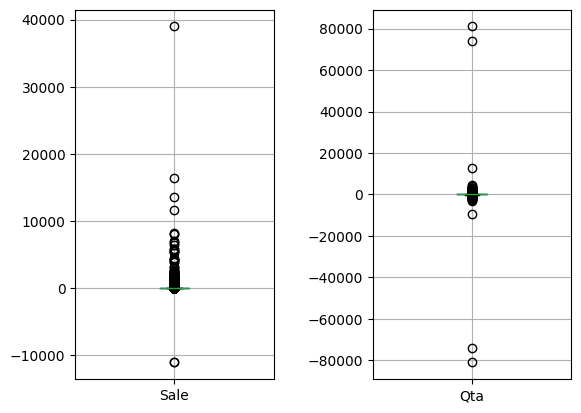

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
df.boxplot(column=['Sale'], ax=ax1)
df.boxplot(column=['Qta'], ax=ax2)
fig.subplots_adjust(wspace=0.5)

plt.savefig('boxplots_before.png')

In [ ]:
pd.DataFrame([{'transactions': df['BasketID'].nunique(),
               'customers': df['CustomerID'].nunique(),
               'products': df['ProdID'].nunique()}], index=['quantity'])

,transactions,customers,products
quantity,24627,4372,3953


In [ ]:
special_codes = df[df['BasketID'].str.contains('^[a-zA-Z]+', regex=True)]['BasketID'].unique()
special_codes

array(['C536379', 'C536383', 'C536391', ..., 'C581499', 'C581568',
       'C581569'], dtype=object)

In [ ]:
pd.Series(special_codes).apply(lambda x: x[0]).unique()

array(['C', 'A'], dtype=object)

In [ ]:
df[df['BasketID'].str.contains('C')]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
141,C536379,2010-01-12 09:41:00,27.50,14527.0,United Kingdom,D,Discount,-1
154,C536383,2010-01-12 09:49:00,4.65,15311.0,United Kingdom,35004C,SET OF 3 COLOURED FLYING DUCKS,-1
235,C536391,2010-01-12 10:24:00,1.65,17548.0,United Kingdom,22556,PLASTERS IN TIN CIRCUS PARADE,-12
236,C536391,2010-01-12 10:24:00,0.29,17548.0,United Kingdom,21984,PACK OF 12 PINK PAISLEY TISSUES,-24
237,C536391,2010-01-12 10:24:00,0.29,17548.0,United Kingdom,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24
...,...,...,...,...,...,...,...,...
465754,C581490,2011-09-12 09:57:00,0.83,14397.0,United Kingdom,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11
466316,C581499,2011-09-12 10:28:00,224.69,15498.0,United Kingdom,M,Manual,-1
466483,C581568,2011-09-12 11:57:00,10.95,15311.0,United Kingdom,21258,VICTORIAN SEWING BOX LARGE,-5
466484,C581569,2011-09-12 11:58:00,1.25,17315.0,United Kingdom,84978,HANGING HEART JAR T-LIGHT HOLDER,-1


In [ ]:
df[df['BasketID'].str.contains('A')]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
254213,A563186,2011-12-08 14:51:00,-11062.06,NaN,United Kingdom,B,Adjust bad debt,1
254214,A563187,2011-12-08 14:52:00,-11062.06,NaN,United Kingdom,B,Adjust bad debt,1


In [ ]:
special_codes = df[df['ProdID'].str.contains('^[a-zA-Z]+', regex=True)]['ProdID'].unique()
for code in special_codes:
    print("{:<15} -> {:<30}".format(code, df[df['ProdID'] == code]['ProdDescr'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
DOT             -> DOTCOM POSTAGE                
BANK CHARGES    -> Bank Charges                  
S               -> SAMPLES                       
AMAZONFEE       -> AMAZON FEE                    
DCGS0076        -> SUNJAR LED NIGHT NIGHT LIGHT  
gift_0001_40    -> Dotcomgiftshop Gift Voucher £40.00
m               -> Manual                        
gift_0001_30    -> Dotcomgiftshop Gift Voucher £30.00
gift_0001_20    -> Dotcomgiftshop Gift Voucher £20.00
DCGS0072        -> nan                           
DCGS0069        -> OOH LA LA DOGS COLLAR         
DCGS0057        -> nan                           
DCGS0003        -> BOXED GLASS ASHTRAY           
DCGSSBOY        -> BOYS PARTY BAG                
DCGSSGIRL       -> GIRLS PARTY BAG               
PADS            -> PADS TO MATCH ALL C

In summary, this dataset contains 8 attributes that correspond to:

- *BasketID*: a 6 digit integer number uniquely assigned to each purchase; if it starts with a *C*, it indicates a cancellation, if it starts with a with *A* it indicates a bad debt adjusted.
- *BasketDate*: the day and time when each purchase was placed;
- *Sale*: the unit product price, all in the same currency, probably in sterling;
- *CustomerID*: a 5 digit integer number uniquely assigned to each customer;
- *CustomerCountry*: the name of the country where each customer resides;
- *ProdID*: a 5 digit + 1 letter identifier uniquely assigned to each distinct product; identical codes with different letters identify the same products with different characteristics (e.g., 84997D: pink piece polkadot cutlery set - 84997C: blue piece polkadot cutlery set);
- *ProdDescr*: the description of the product purchased;
- *Qta*: the purchased quantities of each product per order.

## Data Cleaning and Integration

### Customer IDs

First of all, we are going to remove the entries for which the *CustomerID* variable is null:

In [ ]:
df = df[~df['CustomerID'].isnull()]
df.reset_index(drop=True, inplace=True)
df['CustomerID'].isnull().any()

False

### Product IDs

Above, it has been seen that some values of the *ProdID* variable indicate a particular transaction (i.e., *D* for *Discount*). We check the contents of this variable by looking for the set of codes that would contain only letters:

In [ ]:
special_codes = df[df['ProdID'].str.contains('^[a-zA-Z]+', regex=True)]['ProdID'].unique()
for code in special_codes:
    print("{:<15} -> {:<30}".format(code, df[df['ProdID'] == code]['ProdDescr'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                
CRUK            -> CRUK Commission               


We see that there are several types of peculiar transactions, connected e.g., to *port charges* or *bank charges*.

In [ ]:
df = df[~df.ProdID.isin(special_codes)]
df.reset_index(drop=True, inplace=True)
df.ProdID.isin(special_codes).any()

False

### Basket IDs

Then, we examined the existence of entries with the prefix *C* for the *BasketID* variable which indicates transactions that have been canceled since for each of those correspond a negative quantity:

In [ ]:
canceled_orders = df[df['BasketID'].str.contains('C')]
canceled_orders

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
152,C536383,2010-01-12 09:49:00,4.65,15311.0,United Kingdom,35004C,SET OF 3 COLOURED FLYING DUCKS,-1
233,C536391,2010-01-12 10:24:00,1.65,17548.0,United Kingdom,22556,PLASTERS IN TIN CIRCUS PARADE,-12
234,C536391,2010-01-12 10:24:00,0.29,17548.0,United Kingdom,21984,PACK OF 12 PINK PAISLEY TISSUES,-24
235,C536391,2010-01-12 10:24:00,0.29,17548.0,United Kingdom,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24
236,C536391,2010-01-12 10:24:00,0.29,17548.0,United Kingdom,21980,PACK OF 12 RED RETROSPOT TISSUES,-24
...,...,...,...,...,...,...,...,...
399249,C581490,2011-09-12 09:57:00,1.95,14397.0,United Kingdom,22178,VICTORIAN GLASS HANGING T-LIGHT,-12
399250,C581490,2011-09-12 09:57:00,0.83,14397.0,United Kingdom,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11
399498,C581568,2011-09-12 11:57:00,10.95,15311.0,United Kingdom,21258,VICTORIAN SEWING BOX LARGE,-5
399499,C581569,2011-09-12 11:58:00,1.25,17315.0,United Kingdom,84978,HANGING HEART JAR T-LIGHT HOLDER,-1


In [ ]:
(canceled_orders['Qta'] < 0).all()

True

We decide to create a new variable in the dataframe that indicate if part of the order has been canceled.

In [ ]:
df['QtaCanc'] = 0

For the cancellations without counterparts, they are probably due to the fact that the buy orders were placed before December 2010, the point of entry of the dataset. Below, we make a census of the cancel orders and check for the existence of counterparts:

In [ ]:
counterpart_entries = []
no_counterpart_entries = []

for index, col in canceled_orders.iterrows():

    df_test = df[(df['CustomerID'] == col['CustomerID']) &
                 (df['ProdID'] == col['ProdID']) &
                 (df['BasketDate'] <= col['BasketDate']) &
                 (df['Qta'] > 0)].copy()

    # cancelation without a counterpart
    if df_test.shape[0] == 0:
        no_counterpart_entries.append(index)

    # cancelation with a counterpart
    elif df_test.shape[0] == 1:
        index_order = df_test.index[0]
        df.loc[index_order, 'QtaCanc'] = -col['Qta']
        counterpart_entries.append(index)

    # multiple counterparts exist: we delete the most recent
    elif df_test.shape[0] > 1:
        df_test.sort_index(ascending=False, inplace=True)
        for idx, val in df_test.iterrows():
            if val['Qta'] < -col['Qta']:
                continue
            df.loc[idx, 'QtaCanc'] = -col['Qta']
            counterpart_entries.append(index)
            break

In [ ]:

n_canceled = canceled_orders.shape[0]
print('Number of canceled orders with a counterpart: {}/{} ({:.2f}%)'.format(
    len(counterpart_entries), n_canceled, len(counterpart_entries) / n_canceled * 100))
print('Number of canceled orders without a counterpart: {}/{} ({:.2f}%)'.format(
    len(no_counterpart_entries), n_canceled, len(no_counterpart_entries) / n_canceled * 100))

df.drop(counterpart_entries, inplace=True)
df.drop(no_counterpart_entries, inplace=True)
df.reset_index(drop=True, inplace=True)

remaining_canceled = df[df['Qta'] < 0].shape[0]
print('Number of remaining canceled orders (with counterpart orders probably placed before December 2010): {}/{} ({:.2f}%)'.format(
    remaining_canceled, n_canceled, remaining_canceled / n_canceled * 100))

Number of canceled orders with a counterpart: 6109/8506 (71.82%)
Number of canceled orders without a counterpart: 2358/8506 (27.72%)
Number of remaining canceled orders (with counterpart orders probably placed before December 2010): 39/8506 (0.46%)


In [ ]:
df['Qta'] = df['Qta'] - df['QtaCanc']
df.drop('QtaCanc', axis=1, inplace=True)

In [ ]:
df = df[df['Qta'] > 0]
df.reset_index(drop=True, inplace=True)
(df['Qta'] < 0).any()

False

### Customers Country

In [ ]:
countries = df['CustomerCountry'].value_counts()
countries

,count
CustomerCountry,
United Kingdom,347171
Germany,8606
France,7972
EIRE,7015
Spain,2400
Netherlands,2322
Belgium,1931
Switzerland,1808
Portugal,1411


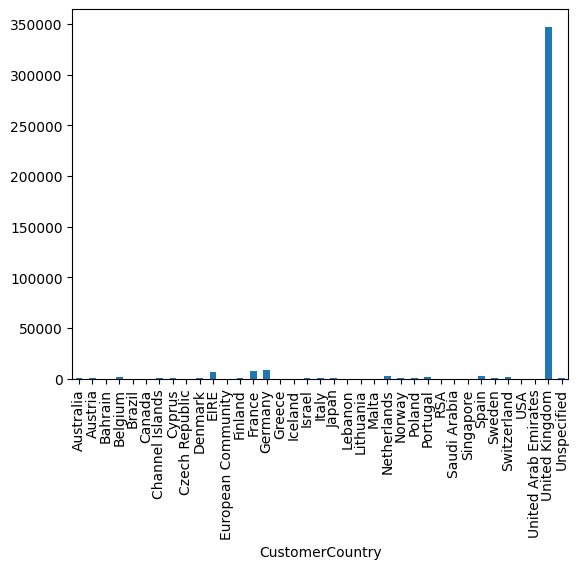

In [ ]:
df['CustomerCountry'].groupby(df['CustomerCountry']).count().plot(kind='bar');

plt.savefig('orders_country_bar.png')

In [ ]:
fig = go.Figure(
    data=go.Choropleth(
        locations=countries.index,
        z=np.log10(countries),
        locationmode='country names',
        colorscale='viridis',
        colorbar_title='LogOrderNb'))
fig.update_layout(title_text='Number of Orders per Country')

fig.show()

In [ ]:
df.drop('CustomerCountry', axis=1, inplace=True)

### Baskets Date

We noticed that 2010 data aren't enough representative, they are only a small fraction of the dataset and they appear to be only around the 12th of the month; in contrast 2011's data are more uniformely distributed, so we decide to keep only the latter:

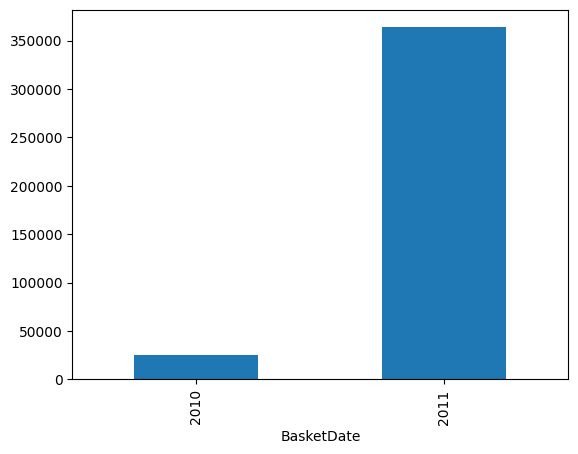

In [ ]:
df['BasketDate'].groupby(df['BasketDate'].dt.year).count().plot(kind='bar');

plt.savefig('year_bar.png')

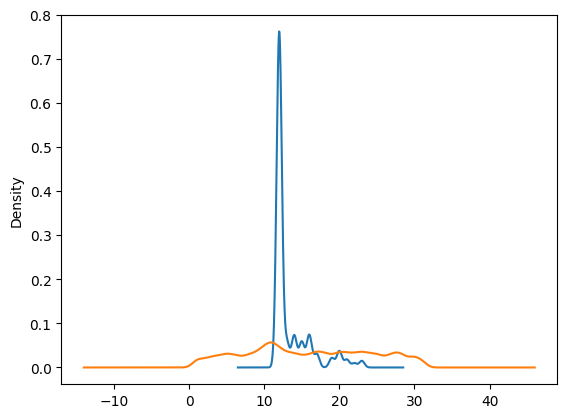

In [ ]:
fig, ax = plt.subplots(1,1)
df[df['BasketDate'].dt.year == 2010]['BasketDate'].dt.day.plot(kind='kde', ax=ax);
df[df['BasketDate'].dt.year == 2011]['BasketDate'].dt.day.plot(kind='kde', ax=ax);

plt.savefig('year_kde.png')

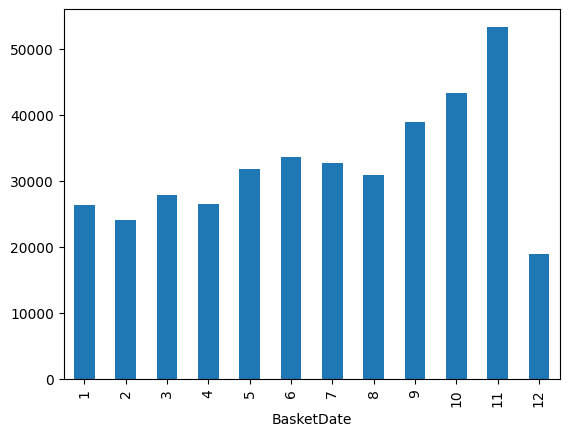

In [ ]:
df['BasketDate'].groupby(df['BasketDate'].dt.month).count().plot(kind='bar');

plt.savefig('month_bar.png')

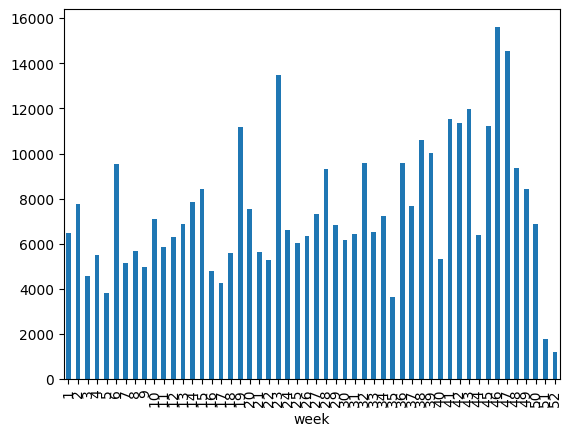

In [ ]:
# Group by the week number and count the occurrences
df['BasketDate'] = pd.to_datetime(df['BasketDate'], errors='coerce')  # Ensure the column is in datetime format
df.groupby(df['BasketDate'].dt.isocalendar().week)['BasketDate'].count().plot(kind='bar')

# Save the plot
plt.savefig('week_bar.png')


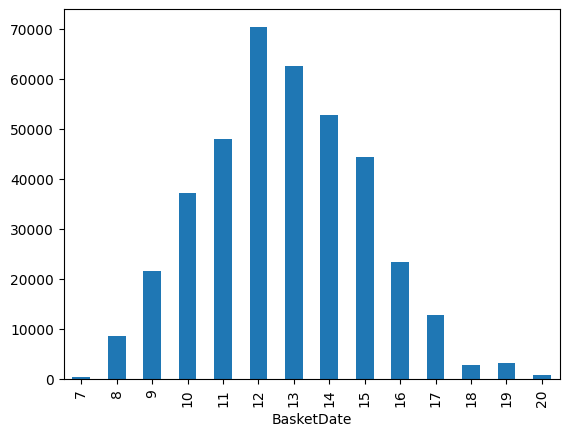

In [ ]:
df['BasketDate'].groupby(df['BasketDate'].dt.hour).count().plot(kind='bar');

plt.savefig('hour_bar.png')

In [ ]:
df = df[df['BasketDate'].dt.year == 2011]
df.reset_index(drop=True, inplace=True)
(df['BasketDate'].dt.year == 2010).any()

False

### Sales \& Quantities

FileNotFoundError: [Errno 2] No such file or directory: '/tex/img/understanding/boxplots_after1.png'

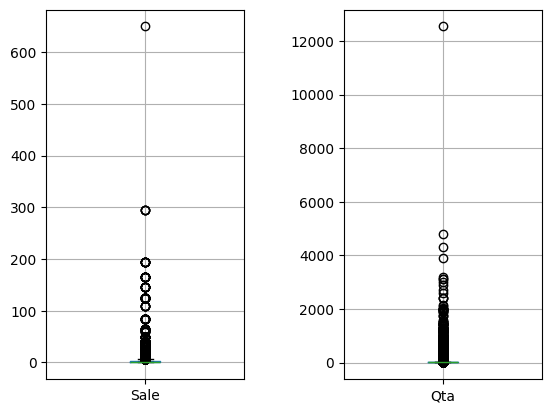

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
df.boxplot(column=['Sale'], ax=ax1)
df.boxplot(column=['Qta'], ax=ax2)
fig.subplots_adjust(wspace=0.5)

plt.savefig('../tex/img/understanding/boxplots_after1.png')

In [ ]:
df[df['Sale'] == 0]

In [ ]:
df['Sale'].replace(0, np.nan, inplace=True)
df['Sale'] = df.groupby('ProdID')['Sale'].transform(lambda x: x.replace(to_replace=np.nan, value=x.mean()))
df['Sale'].isnull().any()

False

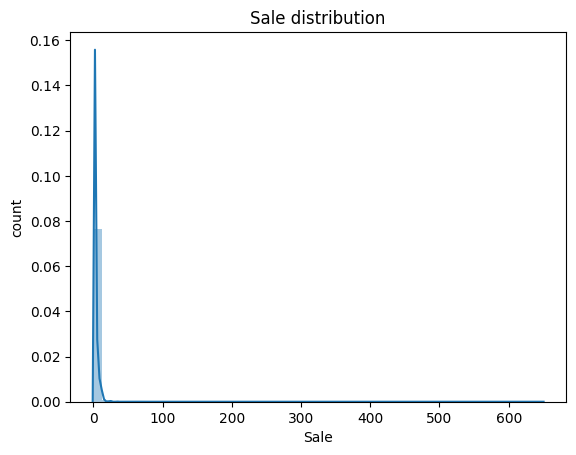

In [ ]:
sns.distplot(df['Sale'])
plt.title('Sale distribution')
plt.xlabel('Sale')
plt.ylabel('count');

In [ ]:
df[df['Sale'] > 200]

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta
50417,546480,2011-03-14 11:38:00,295.0,13452.0,22656,VINTAGE BLUE KITCHEN CABINET,1
61416,547814,2011-03-25 14:19:00,295.0,13452.0,22656,VINTAGE BLUE KITCHEN CABINET,1
88457,551393,2011-04-28 12:22:00,295.0,14973.0,22656,VINTAGE BLUE KITCHEN CABINET,1
114396,554836,2011-05-26 16:25:00,295.0,13015.0,22655,VINTAGE RED KITCHEN CABINET,1
126617,556446,2011-10-06 15:33:00,649.5,15098.0,22502,PICNIC BASKET WICKER 60 PIECES,1


In [ ]:
df.loc[126617, 'Sale'] /= 60
df.loc[126617, 'Qta'] = 60
df.loc[126617, 'ProdDescr'] = 'PICNIC BASKET WICKER'

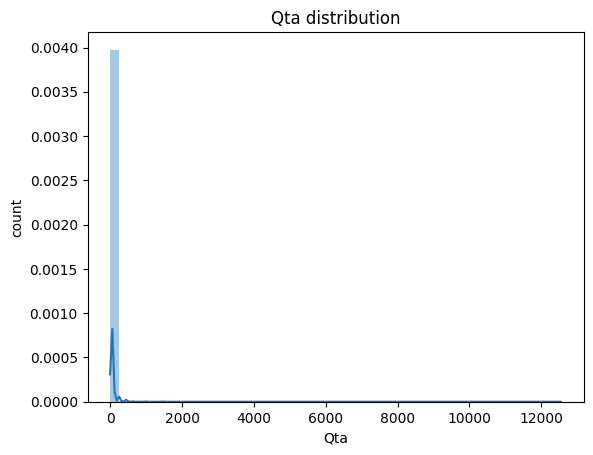

In [ ]:
sns.distplot(df['Qta'])
plt.title('Qta distribution')
plt.xlabel('Qta')
plt.ylabel('count');

In [ ]:
df[df['Qta'] > 3800]

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta
34662,544612,2011-02-22 10:43:00,0.82,18087.0,22053,EMPIRE DESIGN ROSETTE,3906
114728,554868,2011-05-27 10:52:00,0.72,13135.0,22197,SMALL POPCORN HOLDER,4300
276220,573008,2011-10-27 12:26:00,0.21,12901.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800
336932,578841,2011-11-25 15:57:00,0.57,13256.0,84826,ASSTD DESIGN 3D PAPER STICKERS,12540


In [ ]:
df.drop(336932, inplace=True)
df.reset_index(drop=True, inplace=True)
df[df['Qta'] > 3800]

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta
34662,544612,2011-02-22 10:43:00,0.82,18087.0,22053,EMPIRE DESIGN ROSETTE,3906
114728,554868,2011-05-27 10:52:00,0.72,13135.0,22197,SMALL POPCORN HOLDER,4300
276220,573008,2011-10-27 12:26:00,0.21,12901.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800


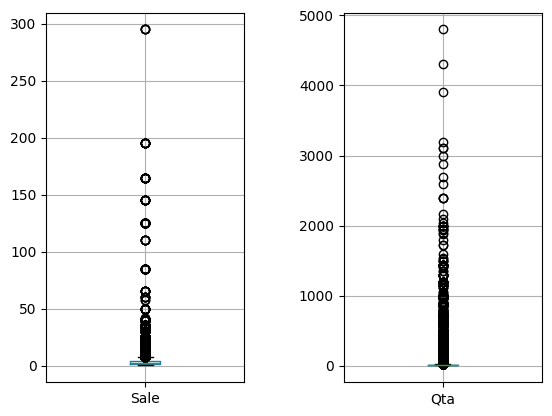

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
df.boxplot(column=['Sale'], ax=ax1)
df.boxplot(column=['Qta'], ax=ax2)
fig.subplots_adjust(wspace=0.5)

plt.savefig('boxplots_after2.png')

### Products Description

In [ ]:
df['ProdDescr'].isnull().any()

False

Now we need to remove the entries corresponding to lower or mixed case *ProdDescr* variable which will be not effective for the feature extraction step since they don't represent a product description:

In [ ]:
df[(df['ProdDescr'].str.islower()) |  # lower case
   (~df['ProdDescr'].str.islower() & ~df['ProdDescr'].str.isupper())]['ProdDescr'].unique()  # mixed case

array(['BAG 125g SWIRLY MARBLES', 'BAG 500g SWIRLY MARBLES',
       '3 TRADITIONAl BISCUIT CUTTERS  SET',
       'FRENCH BLUE METAL DOOR SIGN No', 'NUMBER TILE VINTAGE FONT No ',
       'BAG 250g SWIRLY MARBLES', 'POLYESTER FILLER PAD 40x40cm',
       'POLYESTER FILLER PAD 45x45cm', 'FOLK ART GREETING CARD,pack/12',
       'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
       'POLYESTER FILLER PAD 45x30cm', 'POLYESTER FILLER PAD 30CMx30CM',
       'NUMBER TILE COTTAGE GARDEN No', 'POLYESTER FILLER PAD 65CMx65CM',
       'POLYESTER FILLER PAD 60x40cm', 'FLOWERS HANDBAG blue and orange',
       'Next Day Carriage', 'THE KING GIFT BAG 25x24x12cm',
       'High Resolution Image'], dtype=object)

In [ ]:
df['ProdDescr'] = df['ProdDescr'].str.replace('[^\w\s]', '')  # removing non-word chars (+, -, /, etc.) but leaving spaces
df['ProdDescr'] = df['ProdDescr'].str.replace('[0-9]+[a-zA-Z]*', '')  # removing words containing numbers

df['ProdDescr'] = df['ProdDescr'].apply(lambda descr: ' '.join(descr.split()))  # removing multiple whitespaces

# adjusting specific errors
df['ProdDescr'] = df['ProdDescr'].str.replace('No', '')  # removing 'No'
df['ProdDescr'].replace({'TRADITIONAl BISCUIT CUTTERS SET': 'TRADITIONAl BISCUIT CUTTERS SET'.upper()}, inplace=True)
df['ProdDescr'].replace({'FLOWERS HANDBAG blue and orange': 'FLOWERS HANDBAG blue and orange'.upper()}, inplace=True)
df['ProdDescr'].replace({'FOLK ART GREETING CARDpack': 'FOLK ART GREETING CARD'}, inplace=True)

bad_descr = df[(df['ProdDescr'].str.islower()) |  # lower case
               (~df['ProdDescr'].str.islower() & ~df['ProdDescr'].str.isupper())]['ProdDescr'].unique()  # mixed case
bad_descr

array(['BAG 125g SWIRLY MARBLES', 'BAG 500g SWIRLY MARBLES',
       '3 TRADITIONAl BISCUIT CUTTERS SET', 'BAG 250g SWIRLY MARBLES',
       'POLYESTER FILLER PAD 40x40cm', 'POLYESTER FILLER PAD 45x45cm',
       'FOLK ART GREETING CARD,pack/12',
       'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
       'POLYESTER FILLER PAD 45x30cm', 'POLYESTER FILLER PAD 30CMx30CM',
       'POLYESTER FILLER PAD 65CMx65CM', 'POLYESTER FILLER PAD 60x40cm',
       'Next Day Carriage', 'THE KING GIFT BAG 25x24x12cm',
       'High Resolution Image'], dtype=object)

In [ ]:
df = df[~df['ProdDescr'].isin(bad_descr)]
df.reset_index(drop=True, inplace=True)
df['ProdDescr'].isin(bad_descr).any()

False

## Data Correlation

In [ ]:
df['TotSale'] = df['Qta'] * df['Sale']

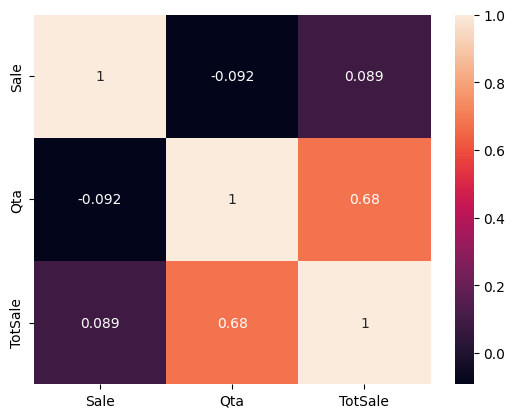

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix and plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True)

# Save the plot
plt.savefig('dataset_corr.png')


## Saving the new dataset

In [ ]:
df.to_csv('new_customer_supermarket.csv', sep='\t', float_format='%.2f')